---
<div style="background-color: #f0f0f0; padding: 20px; border-left: 6px solid #007BFF;">
    <h1 style="font-family: Papyrus; color: #333;">📈 Time Series Modelling of Google Stocks (2024): </h1>
    <h1 style="font-family: Papyrus; color: #333;">🚀 LSTM with TensorFlow</h1>
</div>

---

---
# Library

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

---


In [7]:
google_stock = pd.read_csv("/kaggle/input/google-stock-data-2024/GOOGL_2004-08-01_2024-12-18.csv")

google_stock.columns = google_stock.columns.str.lower().str.replace(' ', '_')
google_stock['date'] = pd.to_datetime(google_stock['date'])

google_stock['volume_byB'] = google_stock['volume'] / 1e9

---
## Summary

In [ ]:
print(google_stock.describe())

---
# Visualization

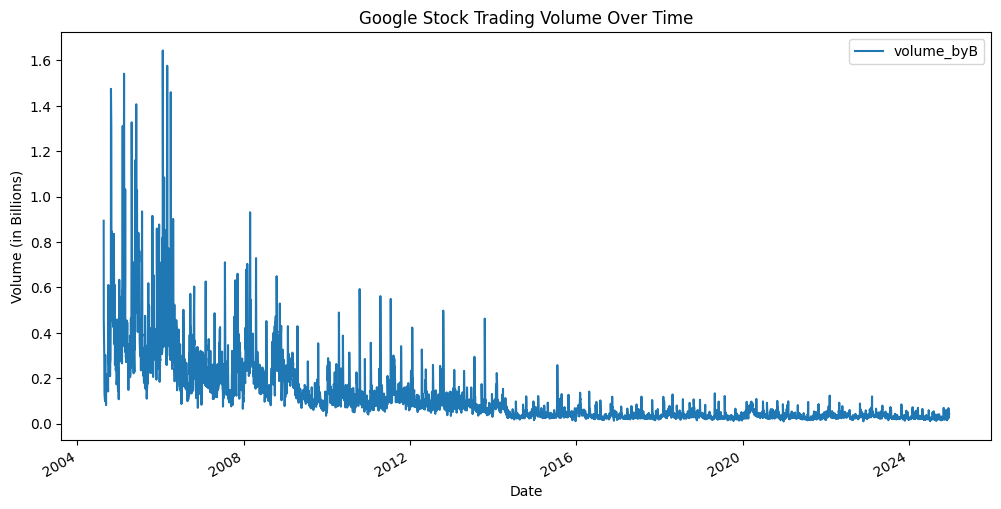

In [8]:
google_stock.set_index('date')[['volume_byB']].plot(figsize=(12, 6))
plt.title('Google Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (in Billions)')
plt.show()

---
# ML Modelling

This is just a quick modelling with LSTM

---
## Splitting

In [9]:
train_size = int(len(google_stock) * 0.8)
train, test = google_stock[:train_size], google_stock[train_size:]

# Normalizing the volume data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['volume_byB']])
test_scaled = scaler.transform(test[['volume_byB']])

---
## Processing

In [11]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30  # Using the past 30 days to predict the next day
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

---
## LSTM Model Building

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


---
### Train LSTM

In [9]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0056
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0031
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0033
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0029
Epoch 5/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0033
Epoch 6/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0028
Epoch 7/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0032
Epoch 8/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0028
Epoch 9/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0029
Epoch 10/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0028
Epoch 11/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0032
Epoch 12/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0027
Epoch 13/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0028
Epoch 14/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0026
Epoch 15/100
127/127 ━━━━━━━━

In [12]:
print(f"Temps d execution sur CPU : {time:.2f} secondes")

Temps d execution sur CPU : 303.00 secondes


---
### Model Metrics Evaluation

In [10]:
from sklearn.metrics import mean_squared_error

def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Making predictions on test data
predicted_volume = model.predict(X_test)
predicted_volume = scaler.inverse_transform(predicted_volume)

rmse = np.sqrt(mean_squared_error(test['volume_byB'][time_step + 1:], predicted_volume))
print("Root Mean Square Error (RMSE):", rmse)

mape = calculate_mape(test['volume_byB'][time_step + 1:], predicted_volume)
print("Mean Absolute Percentage Error (MAPE):", mape)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Root Mean Square Error (RMSE): 0.014706042463458014
Mean Absolute Percentage Error (MAPE): 48.164377113324605


### Plot

In [14]:
import tensorflow as tf
from tensorflow.keras import mixed_precision
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import time

# Activation de la précision mixte
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Distribution sur plusieurs GPU
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Utilisation de tf.data pour améliorer la gestion des données
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=10000).batch(100).prefetch(tf.data.experimental.AUTOTUNE)

    # Entraînement du modèle
    start=time.time()
    model.fit(train_dataset, epochs=100)
    end=time.time()
    temps=end-start
    print(f"Temps d'entraînement du modèle sur GPU : {temps:.2f} secondes")


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0075
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0031
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0039
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0034
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0034
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0030
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0033
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0032
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0032
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0033
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0026
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0030
Epoch 13/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0031
Epoch 14/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0031
Epoch 15/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - lo

In [16]:
import tensorflow as tf
from tensorflow.keras import mixed_precision
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
import time

# Activation de la précision mixte
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Distribution sur plusieurs GPU
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    # Optimiseur Nadam pour de meilleures performances
    model.compile(optimizer='Nadam', loss='mean_squared_error')

    # Utilisation de tf.data pour améliorer la gestion des données
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=10000).batch(200).prefetch(tf.data.experimental.AUTOTUNE)

    # Callback d'arrêt précoce
    early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    # Entraînement du modèle
    start = time.time()
    model.fit(train_dataset, epochs=100, callbacks=[early_stopping])
    end = time.time()

    temps = end - start
    print(f"Temps d'entraînement du modèle sur GPU : {temps:.2f} secondes")


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0087
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0033
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0040
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0030
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0033
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0033
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0033
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0033
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0034
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0029
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0030
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0029
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

In [17]:
import tensorflow as tf
from tensorflow.keras import mixed_precision
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
import time

# Activation de la précision mixte
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Distribution sur plusieurs GPU
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    # Optimiseur Nadam pour de meilleures performances
    model.compile(optimizer='Nadam', loss='mean_squared_error')

    # Utilisation de tf.data pour améliorer la gestion des données
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=10000).batch(500).prefetch(tf.data.experimental.AUTOTUNE)

    # Callback d'arrêt précoce
    early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    # Entraînement du modèle
    start = time.time()
    model.fit(train_dataset, epochs=100, callbacks=[early_stopping])
    end = time.time()

    temps = end - start
    print(f"Temps d'entraînement du modèle sur GPU : {temps:.2f} secondes")


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0129
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0045
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0037
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0037
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0038
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0033
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0034
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0035
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0033
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0027
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0031
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0033
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0030
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0034
Epoch 16/100
9/9 ━━

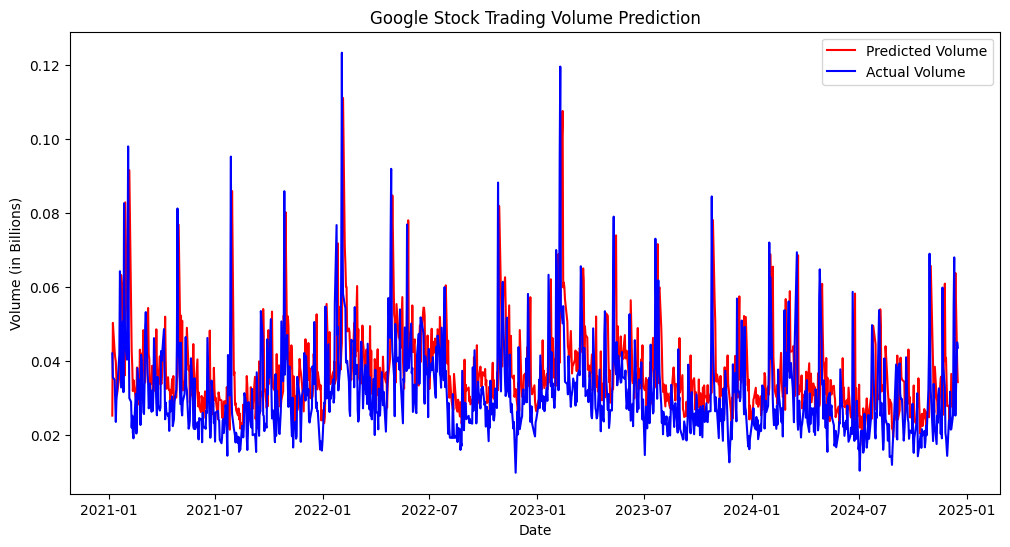

In [11]:
# Plotting the results CPU
plt.figure(figsize=(12, 6))
plt.plot(test['date'][time_step + 1:], predicted_volume, color='red', label='Predicted Volume')
plt.plot(test['date'][time_step + 1:], test['volume_byB'][time_step + 1:], color='blue', label='Actual Volume')
plt.title('Google Stock Trading Volume Prediction')
plt.xlabel('Date')
plt.ylabel('Volume (in Billions)')
plt.legend()
plt.show()
